In [4]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [25]:
# Structure of xlsx file
filein = "example.xlsx"  # where the data is located
ncolours = 12 # number of colours for plots
colourscheme = 'viridis' # for others see https://matplotlib.org/examples/color/colormaps_reference.html
linekeys=['LINE_A','LINE_B'] # labels of tabs of ERT data
topokeys=['LINE_A_TOPO','LINE_B_TOPO'] # labels of tabs of topography data


In [26]:
nsubfigs=np.size(linekeys)

In [27]:
xl_file = pd.ExcelFile(filein)

In [28]:
ERT={}
for j in xl_file.sheet_names:
    ERT[j]=xl_file.parse(j)

In [29]:
allrhos=[]
for i in linekeys:
    print(i)
    rho=ERT[i]['Res'].values
    allrhos.append(rho)
allrhos = np.concatenate(allrhos)
clevels = np.logspace(np.log10(np.min(allrhos)),np.log10(np.max(allrhos)),num=ncolours,base=10)

LINE_A
LINE_B


[Text(1, 3.468, '3'),
 Text(1, 7.025107936633494, '7'),
 Text(1, 14.230721315268422, '14'),
 Text(1, 28.827091480943366, '28'),
 Text(1, 58.39487576494666, '58'),
 Text(1, 118.29016874136495, '118'),
 Text(1, 239.61972412072595, '239'),
 Text(1, 485.39631652088815, '485'),
 Text(1, 983.2645662063309, '983'),
 Text(1, 1991.7934567089344, '1991'),
 Text(1, 4034.764711897519, '4034'),
 Text(1, 8173.199999999998, '8173')]

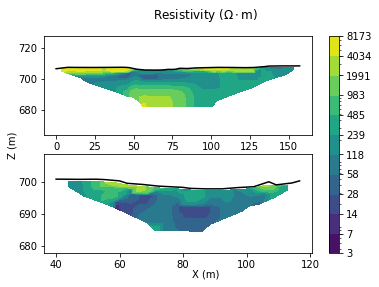

In [30]:
fig, axes = plt.subplots(nrows=nsubfigs, ncols=1,sharex=False)
i=0
for ax in axes.flat:
    keyhere=linekeys[i]
    x=ERT[keyhere]['X']
    z=ERT[keyhere]['Z']
    rho=ERT[keyhere]['Res']
    triang = mpl.tri.Triangulation(x, z)
    mask = mpl.tri.TriAnalyzer(triang).get_flat_tri_mask(.1)
    triang.set_mask(mask)
    topokeyhere=topokeys[i]
    xt=ERT[topokeyhere]['X']
    zt=ERT[topokeyhere]['Z']
    cc=ax.tricontourf(triang,rho,levels=clevels, norm=mpl.colors.LogNorm(vmin=allrhos.min(), vmax=allrhos.max()), cmap=colourscheme)
    ax.axis('equal')
    topokeyhere=topokeys[i]
    ax.plot(xt,zt,'k')
    i=i+1
fig.text(0.5, 0.04, 'X (m)', ha='center')
fig.text(0.04, 0.5, 'Z (m)', va='center', rotation='vertical')
fig.suptitle('Resistivity ($\Omega\cdot$m)')
clabels=[]
for c in clevels: 
    clabels.append('%d' % c) # label all levels with no-decimal formatting
thecbar=fig.colorbar(cc, ax=axes,ticks=clevels)
thecbar.ax.set_yticklabels(clabels)